In [17]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt




In [18]:
model = load_model("mobilenet_augmented.keras")


In [19]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "food_6", 
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(180, 180),
    batch_size=16,
    label_mode="categorical")

class_names = val_ds.class_names


Found 464 files belonging to 4 classes.
Using 92 files for validation.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


2025-07-21 00:43:18.988649: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


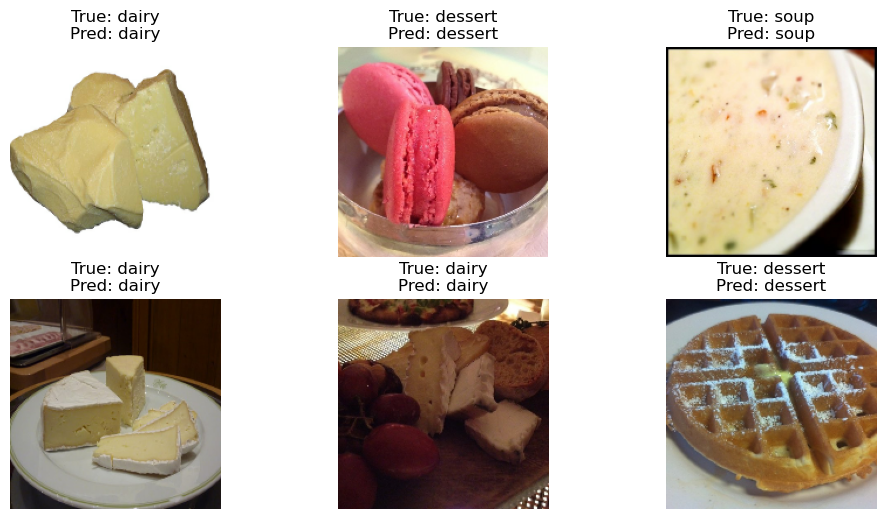

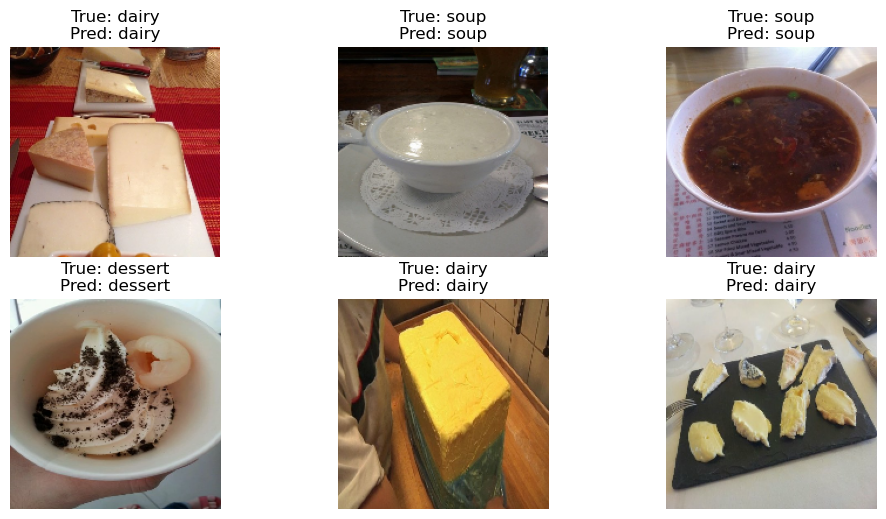

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Getting a batch from the validation set
for images, labels in val_ds.take(2):
    preds = model.predict(images)
    
    plt.figure(figsize=(12, 6))
    for i in range(6):  # Shows first 6 predictions
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = class_names[np.argmax(labels[i])]
        pred_label = class_names[np.argmax(preds[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis("off")
